<a href="https://colab.research.google.com/github/maresyp/Leaves-Classification-Tensorflow/blob/master/PSIO_PROJEKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

np.set_printoptions(precision=6, suppress=True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
my_target_size = (256, 256)

In [ ]:
#!rm -rf data

In [ ]:
# !unzip gdrive/MyDrive/leaves_base_project.zip -d data_project
#!unzip path_to_file.zip -d path_to_directory

In [ ]:
!wget https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
!unzip -q 349ac012-2948-4172-bbba-3bf8f76596fd

--2023-06-07 06:24:03--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/349ac012-2948-4172-bbba-3bf8f76596fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.67.14, 3.5.69.128, 52.92.17.210, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.67.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 949267727 (905M) [application/zip]
Saving to: ‘349ac012-2948-4172-bbba-3bf8f76596fd’

349ac012-2948-4172- 100%[===================>] 905.29M  13.2MB/s    in 72s     

2023-06-07 06:25:16 (12.6 MB/s) - ‘349ac012-2948-4172-bbba-3bf8f76596fd’ saved [949267727/949267727]



In [ ]:
base_dir = './Plant_leave_diseases_dataset_with_augmentation'
raw_no_of_files = {}
classes = [name for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]
classes

['Apple___Black_rot',
 'Raspberry___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Pepper,_bell___Bacterial_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Tomato___Septoria_leaf_spot',
 'Squash___Powdery_mildew',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Northern_Leaf_Blight',
 'Potato___healthy',
 'Soybean___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Blueberry___healthy',
 'Peach___Bacterial_spot',
 'Cherry___Powdery_mildew',
 'Grape___Esca_(Black_Measles)',
 'Strawberry___Leaf_scorch',
 'Tomato___Leaf_Mold',
 'Tomato___Tomato_mosaic_virus',
 'Apple___healthy',
 'Grape___Black_rot',
 'Strawberry___healthy',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Potato___Early_blight',
 'Corn___Common_rust',
 'Peach___healthy',
 'Corn___healthy',
 'Grape___healthy',
 'Potato___Late_bligh

In [ ]:
for dir in classes:
    raw_no_of_files[dir] = len(os.listdir(os.path.join(base_dir, dir)))

raw_no_of_files.items()

dict_items([('Apple___Black_rot', 1000), ('Raspberry___healthy', 1000), ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 5357), ('Pepper,_bell___Bacterial_spot', 1000), ('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 1076), ('Tomato___Bacterial_spot', 2127), ('Apple___Cedar_apple_rust', 1000), ('Tomato___Target_Spot', 1404), ('Pepper,_bell___healthy', 1478), ('Tomato___Septoria_leaf_spot', 1771), ('Squash___Powdery_mildew', 1835), ('Orange___Haunglongbing_(Citrus_greening)', 5507), ('Corn___Cercospora_leaf_spot Gray_leaf_spot', 1000), ('Corn___Northern_Leaf_Blight', 1000), ('Potato___healthy', 1000), ('Soybean___healthy', 5090), ('Tomato___Spider_mites Two-spotted_spider_mite', 1676), ('Blueberry___healthy', 1502), ('Peach___Bacterial_spot', 2297), ('Cherry___Powdery_mildew', 1052), ('Grape___Esca_(Black_Measles)', 1383), ('Strawberry___Leaf_scorch', 1109), ('Tomato___Leaf_Mold', 1000), ('Tomato___Tomato_mosaic_virus', 1000), ('Apple___healthy', 1645), ('Grape___Black_rot', 1180), ('Strawberr

In [ ]:
data_dir = './images'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')    # katalog zbioru treningowego
valid_dir = os.path.join(data_dir, 'valid')    # katalog zbioru walidacyjnego
test_dir = os.path.join(data_dir, 'test')      # katalog zbioru testowego

dirs = [train_dir, valid_dir, test_dir]

for directory in dirs:
    if not os.path.exists(directory):
        os.mkdir(directory)

for class_name in classes:
    train_class_dir = os.path.join(train_dir, class_name)
    valid_class_dir = os.path.join(valid_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    for directory in (train_class_dir, valid_class_dir, test_class_dir):
        if not os.path.exists(directory):
            os.mkdir(directory)

In [ ]:
all_fnames = []

for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    fnames = os.listdir(class_dir)
    fnames = [fname for fname in fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
    all_fnames.append(fnames)

size = min(len(fnames) for fnames in all_fnames)

train_size = int(np.floor(0.7 * size))
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

train_idx = train_size
valid_idx = train_size + valid_size
test_idx = train_size + valid_size + test_size

print('train_size: %d, valid_size: %d, test_size: %d\n' % (train_size, valid_size, test_size))

train_size: 700, valid_size: 200, test_size: 100



In [ ]:
import shutil

for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    fnames = os.listdir(class_dir)
    fnames = [fname for fname in fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

    train_class_dir = os.path.join(train_dir, class_name)
    valid_class_dir = os.path.join(valid_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    for i, fname in enumerate(fnames):
        if i <= train_idx:
            src = os.path.join(class_dir, fname)
            dst = os.path.join(train_class_dir, fname)
            shutil.copyfile(src, dst)
        elif train_idx < i <= valid_idx:
            src = os.path.join(class_dir, fname)
            dst = os.path.join(valid_class_dir, fname)
            shutil.copyfile(src, dst)
        elif valid_idx < i < test_idx:
            src = os.path.join(class_dir, fname)
            dst = os.path.join(test_class_dir, fname)
            shutil.copyfile(src, dst)

    print(class_name, '- zbiór treningowy:', len(os.listdir(train_class_dir)))
    print(class_name, '- zbiór walidacyjny:', len(os.listdir(valid_class_dir)))
    print(class_name, '- zbiór testowy:', len(os.listdir(test_class_dir)))

Apple___Black_rot - zbiór treningowy: 701
Apple___Black_rot - zbiór walidacyjny: 200
Apple___Black_rot - zbiór testowy: 99
Raspberry___healthy - zbiór treningowy: 701
Raspberry___healthy - zbiór walidacyjny: 200
Raspberry___healthy - zbiór testowy: 99
Tomato___Tomato_Yellow_Leaf_Curl_Virus - zbiór treningowy: 701
Tomato___Tomato_Yellow_Leaf_Curl_Virus - zbiór walidacyjny: 200
Tomato___Tomato_Yellow_Leaf_Curl_Virus - zbiór testowy: 99
Pepper,_bell___Bacterial_spot - zbiór treningowy: 701
Pepper,_bell___Bacterial_spot - zbiór walidacyjny: 200
Pepper,_bell___Bacterial_spot - zbiór testowy: 99
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) - zbiór treningowy: 701
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) - zbiór walidacyjny: 200
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) - zbiór testowy: 99
Tomato___Bacterial_spot - zbiór treningowy: 701
Tomato___Bacterial_spot - zbiór walidacyjny: 200
Tomato___Bacterial_spot - zbiór testowy: 99
Apple___Cedar_apple_rust - zbiór treningowy: 701
Apple___Cedar_a

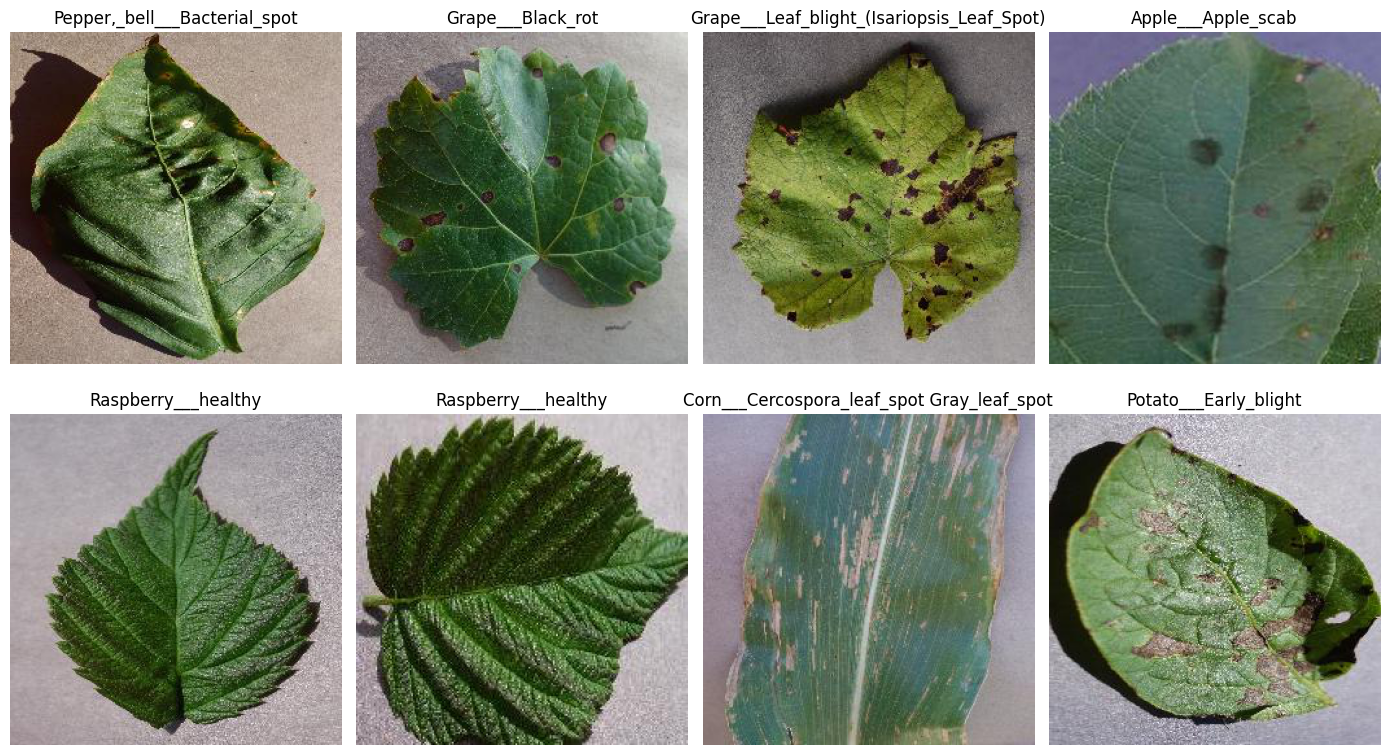

In [ ]:
import random
from tensorflow.keras.preprocessing import image

num_images = 8  # Liczba wyświetlanych obrazów
grid_size = (2, 4)  # Rozmiar siatki

fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(14, 8))

for i, ax in enumerate(axes.flat):
    # Losowanie klasy
    random_class = random.choice(classes)

    # Ścieżka do wylosowanej klasy
    class_dir = os.path.join(base_dir, random_class)

    # Lista plików w wylosowanej klasie
    fnames = os.listdir(class_dir)
    fnames = [fname for fname in fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

    if len(fnames) > 0:
        # Losowanie pliku ze zdjęciem
        random_image = random.choice(fnames)

        # Ścieżka do wylosowanego zdjęcia
        img_path = os.path.join(class_dir, random_image)

        # Wyświetlanie obrazu
        img = image.load_img(img_path)

        ax.imshow(img)
        ax.grid(False)
        ax.axis(False)
        ax.set_title(random_class)  # Dodanie tytułu z nazwą klasy

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=my_target_size,
    batch_size=32,
    class_mode='categorical')  # Zmiana class_mode na 'categorical'

valid_generator = valid_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=my_target_size,
    batch_size=32,
    class_mode='categorical')  # Zmiana class_mode na 'categorical'


Found 27339 images belonging to 39 classes.
Found 7800 images belonging to 39 classes.


In [ ]:
def display_augmented_images(directory, idx):
    """
    Funkcja zwraca wykres przykładowych obrazów uzyskanych za pomocą techniki
    augmentacji danych.
    """
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=my_target_size)

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(16, 8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

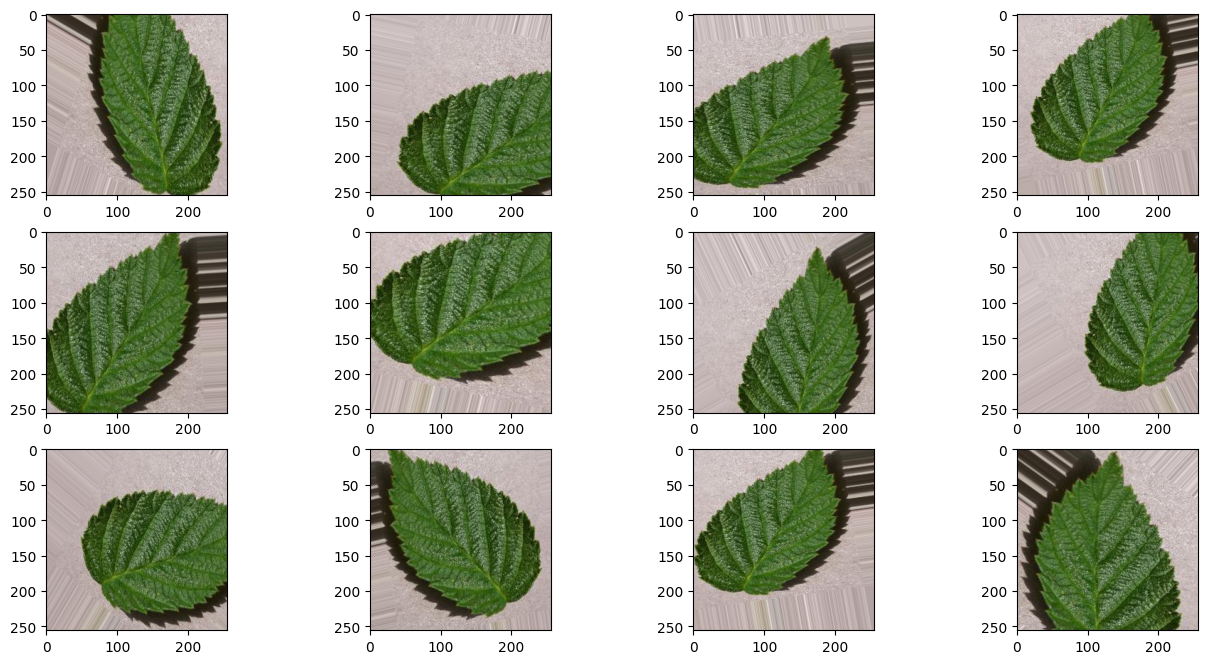

In [ ]:
#@title Zbiór treningowy drone:
idx = 513 #@param {type:'slider', min:0, max:919}            
display_augmented_images(os.path.join(train_dir, classes[1]), idx)

In [ ]:
!rm -rf logs
!mkdir logs

tensorboard = TensorBoard(log_dir='logs')

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
conv_base.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=len(classes), activation='softmax'))  # Zmieniono units na num_classes
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 39)                10023     
                                                                 
Total params: 23,113,575
Trainable params: 23,113,575
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(f'Liczba warstw trenowanych przed zamrożeniem {len(model.trainable_weights)}')
conv_base.trainable = False
print(f'Liczba warstw trenowanych po zamrożeniu {len(model.trainable_weights)}')

Liczba warstw trenowanych przed zamrożeniem 30
Liczba warstw trenowanych po zamrożeniu 4


In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',  # Zmiana funkcji straty
              metrics=['accuracy'])  # Dodanie metryk

In [ ]:
batch_size = 32
steps_per_epoch = train_size // batch_size
validation_steps = valid_size // batch_size

history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=400,    # 100
                             validation_data=valid_generator,
                             validation_steps=validation_steps,
                             callbacks=[tensorboard])

<ipython-input-21-476652697be2>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/400
21/21 [==============================] - 26s 624ms/step - loss: 3.6060 - accuracy: 0.0908 - val_loss: 3.0739 - val_accuracy: 0.2760
Epoch 2/400
21/21 [==============================] - 13s 639ms/step - loss: 3.1077 - accuracy: 0.2039 - val_loss: 2.8513 - val_accuracy: 0.2135
Epoch 3/400
21/21 [==============================] - 13s 592ms/step - loss: 2.8352 - accuracy: 0.2753 - val_loss: 2.4211 - val_accuracy: 0.4010
Epoch 4/400
21/21 [==============================] - 13s 634ms/step - loss: 2.6145 - accuracy: 0.3185 - val_loss: 2.2291 - val_accuracy: 0.4479
Epoch 5/400
21/21 [==============================] - 14s 649ms/step - loss: 2.3404 - accuracy: 0.3958 - val_loss: 2.0764 - val_accuracy: 0.5469
Epoch 6/400
21/21 [==============================] - 13s 632ms/step - loss: 2.1900 - accuracy: 0.4449 - val_loss: 1.7715 - val_accuracy: 0.6042
Epoch 7/400
21/21 [==============================] - 14s 638ms/step - loss: 2.0650 - accuracy: 0.4658 - val_loss: 1.7724 - val_accuracy:

In [ ]:
%load_ext tensorboard

In [ ]:
# !tensorboard dev upload --logdir logs

2023-06-07 08:14:50.417403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   QVWN-PHST

Traceback (most recent call last):

^C


In [ ]:
def plot_hist(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_accuracy'], name='val_accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Accuracy vs. Val Accuracy', xaxis_title='Epoki', yaxis_title='Accuracy', yaxis_type='log')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'], y=hist['val_loss'], name='val_loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='Loss vs. Val Loss', xaxis_title='Epoki', yaxis_title='Loss', yaxis_type='log')
    fig.show()

plot_hist(history)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=my_target_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

y_prob = model.predict_generator(test_generator, test_generator.samples)
y_prob = y_prob.ravel()
y_prob
     

Found 3861 images belonging to 39 classes.


<ipython-input-31-5771188b2419>:10: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



array([0.997886, 0.000006, 0.001371, ..., 0.      , 0.      , 0.982856],
      dtype=float32)

In [ ]:
y_true = test_generator.classes
y_true

array([ 0,  0,  0, ..., 38, 38, 38], dtype=int32)

In [ ]:
y_pred = predictions['class'].values
y_pred

array([15760, 15760, 15760, ..., 15760, 15760, 15760])

In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

ValueError: ignored

In [ ]:
# base_dir = './data_project/leaves_base_pm/D1'
# test_dir = './data_project/leaves_base_pm/D1/test'
# train_dir = './data_project/leaves_base_pm/D1/train'

In [ ]:
# import os

# def count_files_in_folder(folder_path):
#     count = 0
#     for _, _, files in os.walk(folder_path):
#         count += len(files)
#     return count

# def print_folder_info(directory_path):
#     try:
#         folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]
#         for folder in folders:
#             folder_path = os.path.join(directory_path, folder)
#             file_count = count_files_in_folder(folder_path)
#             print(f"Folder: {folder}\tFiles: {file_count}")
#     except FileNotFoundError:
#         print("Directory not found.")
#     except PermissionError:
#         print("Permission denied while accessing the directory.")

# # Print folder information
# print("Test folder")
# print_folder_info(test_dir)
# print("Train folder")
# print_folder_info(train_dir)


In [ ]:
# import os
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

# def print_random_photos_from_directories(parent_directory, num_photos):
#     try:
#         directories = [directory for directory in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, directory))]

#         for directory in directories:
#             directory_path = os.path.join(parent_directory, directory)
#             image_files = [file for file in os.listdir(directory_path) if file.endswith(('.jpg', '.jpeg', '.png'))]
#             random_files = random.sample(image_files, min(num_photos, len(image_files)))

#             plt.figure()
#             plt.suptitle(directory)

#             for i, file in enumerate(random_files, 1):
#                 image_path = os.path.join(directory_path, file)
#                 image = Image.open(image_path)

#                 plt.subplot(2, 2, i)
#                 plt.imshow(image)
#                 plt.title(file)
#                 plt.axis('off')

#             plt.tight_layout()
#             plt.show()
#     except FileNotFoundError:
#         print("Directory not found.")
#     except PermissionError:
#         print("Permission denied while accessing the directory.")

# # Specify the path to the parent directory containing the subdirectories with photos
# parent_directory_path = train_dir

# # Specify the number of random photos to print from each subdirectory
# num_photos = 4

# # Print random photos from each directory
# print_random_photos_from_directories(parent_directory_path, num_photos)

